In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [ ]:
#Model Tuning

In [18]:
rf_params = {"max_depth": [5,8],
            "max_features": [2,5],
            "n_estimators": [200,2000],
             "min_samples_split":[10,100]}

In [19]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [20]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 10,
 'n_estimators': 2000}

In [21]:
rf_model=RandomForestRegressor(max_depth=5, max_features=2, min_samples_split=10, n_estimators=2000,random_state=42)
rf_tuned=rf_model.fit(X_train, y_train)

In [22]:
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.7568384297776

In [23]:
##Variable Importance

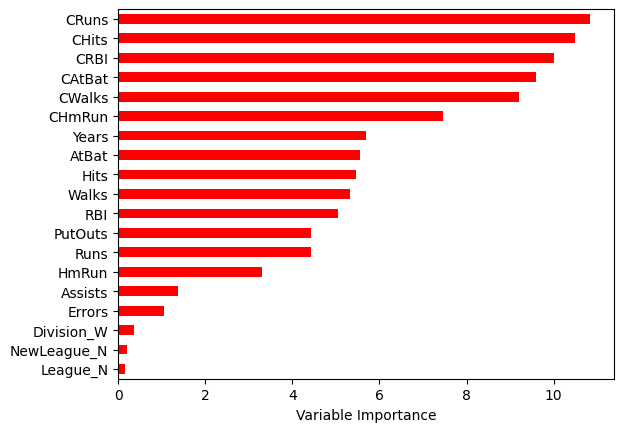

In [24]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Variable Importance")
plt.gca().legend_=None
plt.show()